In [1]:
from pathlib import Path

import numpy as np
from zanj import ZANJ

from maze_dataset import MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.benchmark.config_sweep import (
    SweepResult,
    full_percolation_analysis,
    dataset_success_fraction,
    plot_grouped,
)
from maze_dataset.benchmark.sweep_fit import sweep_fit

F:\KNC\maze-dataset\maze_dataset\dataset\maze_dataset.py:280: SyntaxWarning: invalid escape sequence '\c'
  """
f:\KNC\maze-dataset\.venv\Lib\site-packages\juliacall\__init__.py:61: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# run a basic analysis

tqdm_allowed_kwargs = {'unit_scale', 'postfix', 'maxinterval', 'lock_args', 'ascii', 'initial', 'iterable', 'dynamic_ncols', 'nrows', 'disable', 'colour', 'miniters', 'delay', 'gui', 'smoothing', 'total', 'unit', 'write_bytes', 'self', 'position', 'bar_format', 'ncols', 'leave', 'desc', 'unit_divisor', 'file', 'mininterval'}
mapped_kwargs = {'total': 3, 'desc': 'Processing 3 items'}


Processing 3 items: 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]


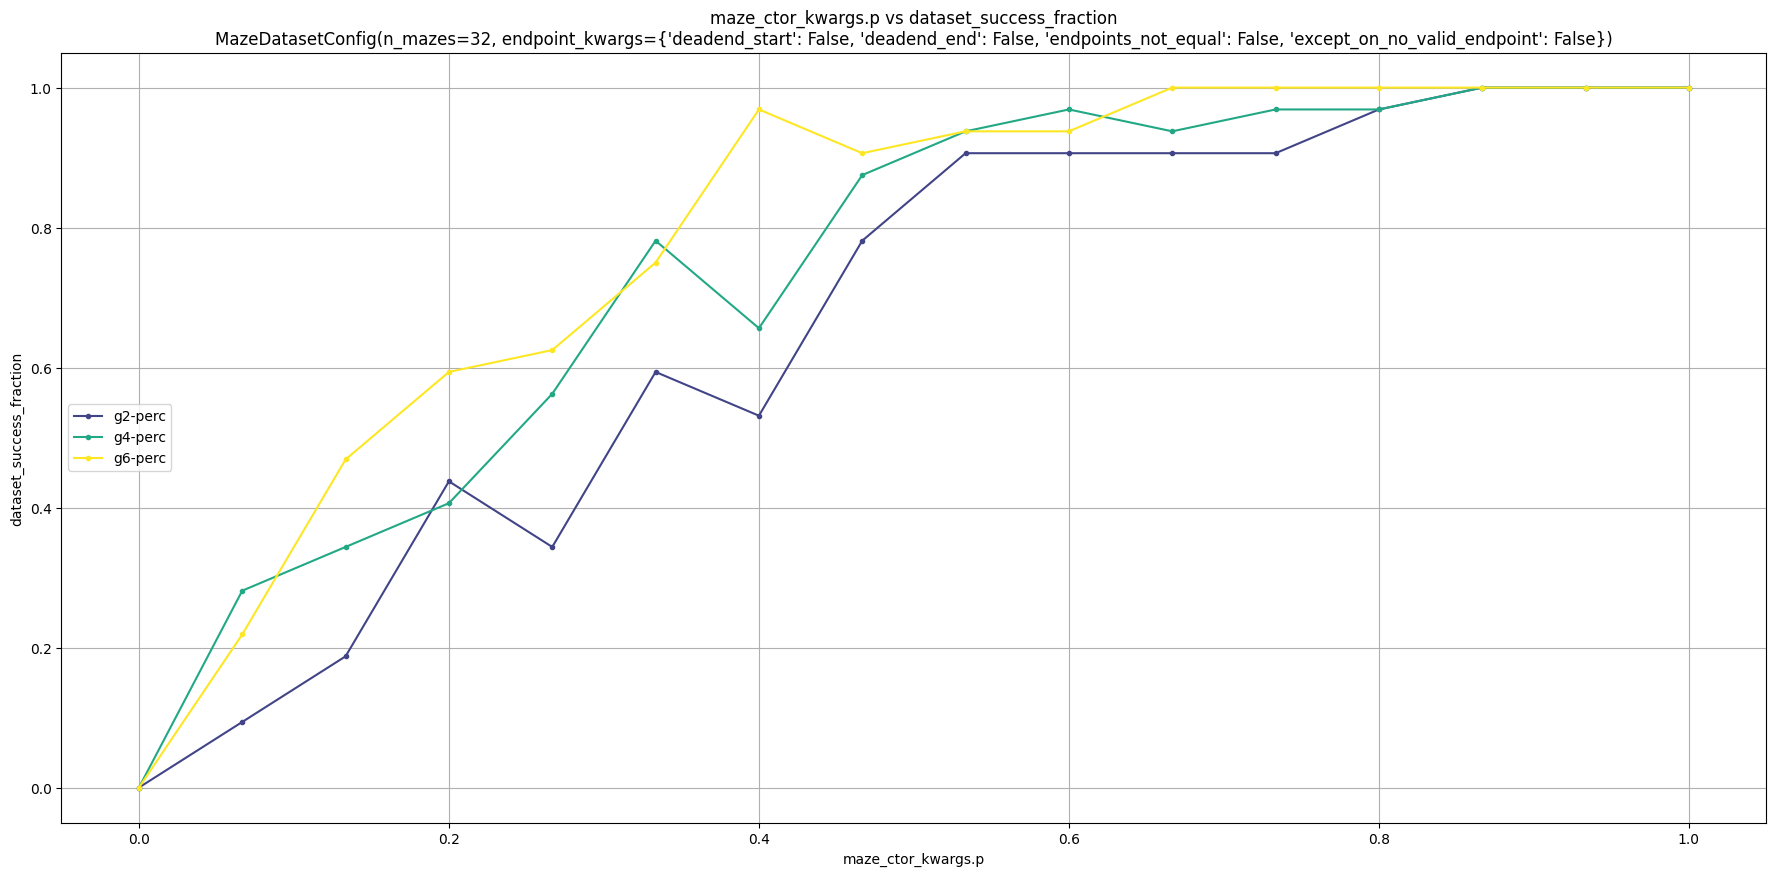

<Axes: title={'center': "maze_ctor_kwargs.p vs dataset_success_fraction\nMazeDatasetConfig(n_mazes=32, endpoint_kwargs={'deadend_start': False, 'deadend_end': False, 'endpoints_not_equal': False, 'except_on_no_valid_endpoint': False})"}, xlabel='maze_ctor_kwargs.p', ylabel='dataset_success_fraction'>

In [2]:
# Run the analysis
results: SweepResult = SweepResult.analyze(
    configs=[
        MazeDatasetConfig(
            name=f"g{grid_n}-perc",
            grid_n=grid_n,
            n_mazes=32,
            maze_ctor=LatticeMazeGenerators.gen_percolation,
            maze_ctor_kwargs=dict(),
            endpoint_kwargs=dict(
                deadend_start=False,
                deadend_end=False,
                endpoints_not_equal=False,
                except_on_no_valid_endpoint=False,
            ),
        )
        for grid_n in [2, 4, 6]
    ],
    param_values=np.linspace(0.0, 1.0, 16).tolist(),
    param_key="maze_ctor_kwargs.p",
    analyze_func=dataset_success_fraction,
    parallel=False,
)

# Plot results
results.plot(save_path=None, cfg_keys=["n_mazes", "endpoint_kwargs"])


## check saving/loading

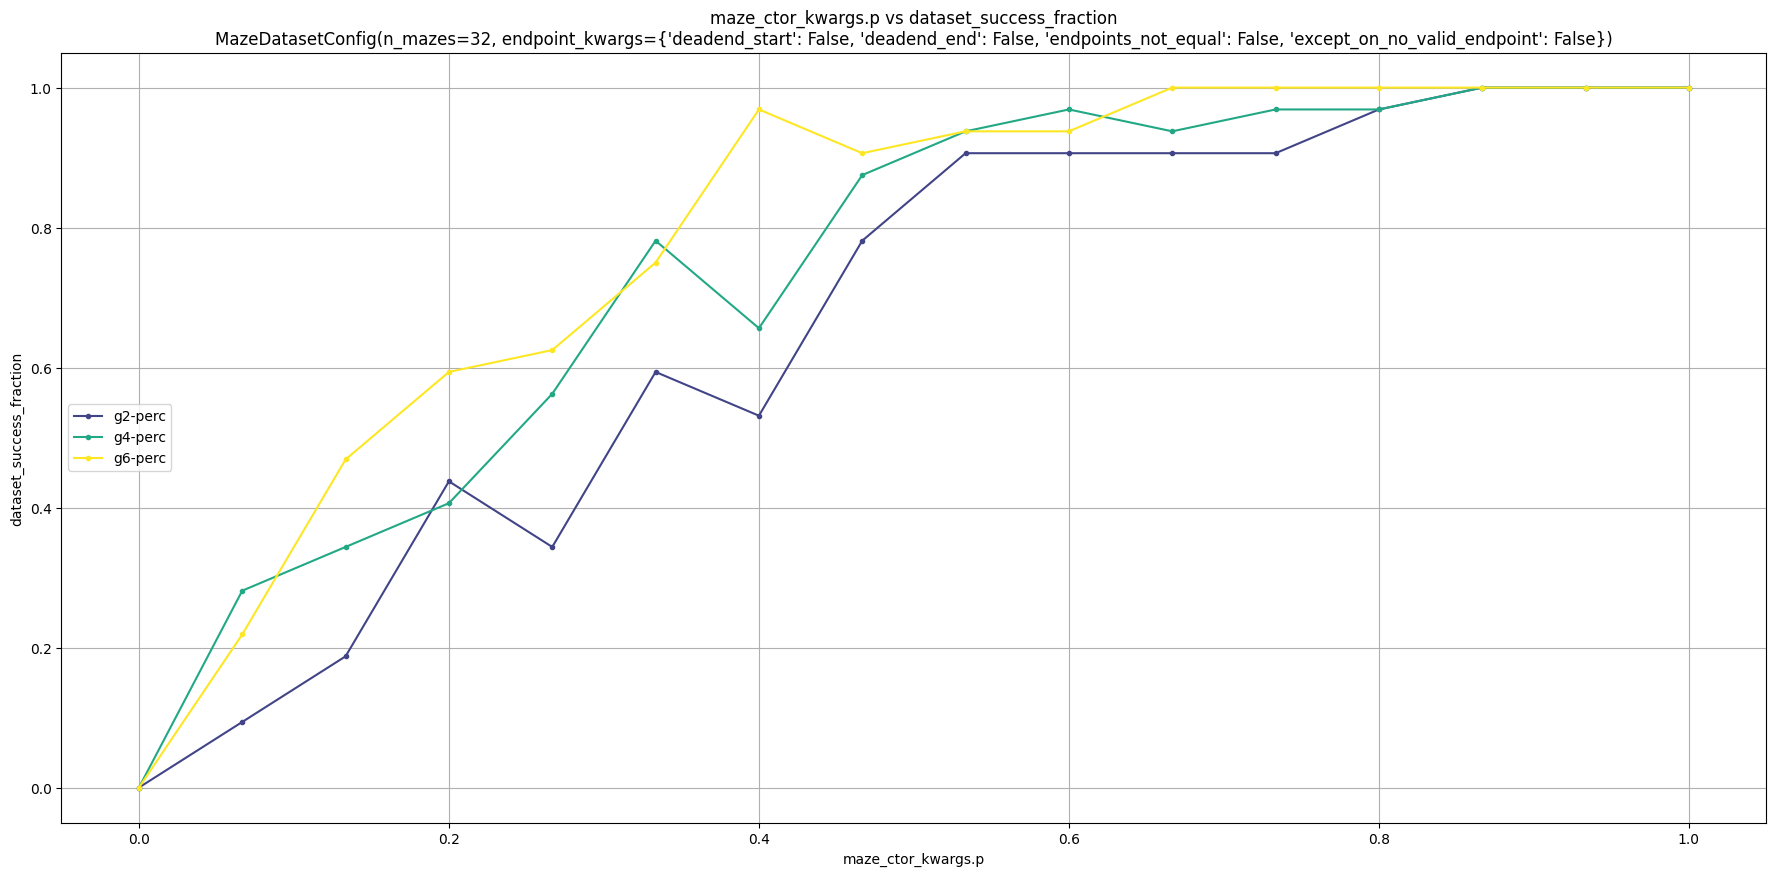

<Axes: title={'center': "maze_ctor_kwargs.p vs dataset_success_fraction\nMazeDatasetConfig(n_mazes=32, endpoint_kwargs={'deadend_start': False, 'deadend_end': False, 'endpoints_not_equal': False, 'except_on_no_valid_endpoint': False})"}, xlabel='maze_ctor_kwargs.p', ylabel='dataset_success_fraction'>

In [3]:
path = Path("../tests/_temp/dataset_frac_sweep/results_small.zanj")
results.save(path)
ZANJ().read(path).plot(cfg_keys=["n_mazes", "endpoint_kwargs"])

# sweep acrossall endpoint kwargs and generator funcs 

In [4]:
results_sweep: SweepResult = full_percolation_analysis(
    n_mazes=16,
    p_val_count=16,
    grid_sizes=[2, 4, 6],
    parallel=False,
)

tqdm_allowed_kwargs = {'unit_scale', 'postfix', 'maxinterval', 'lock_args', 'ascii', 'initial', 'iterable', 'dynamic_ncols', 'nrows', 'disable', 'colour', 'miniters', 'delay', 'gui', 'smoothing', 'total', 'unit', 'write_bytes', 'self', 'position', 'bar_format', 'ncols', 'leave', 'desc', 'unit_divisor', 'file', 'mininterval'}
mapped_kwargs = {'total': 18, 'desc': 'Processing 18 items'}


Processing 18 items: 100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Saving results to ../docs/benchmarks/percolation_fractions/result-n16-c18-p16.zanj


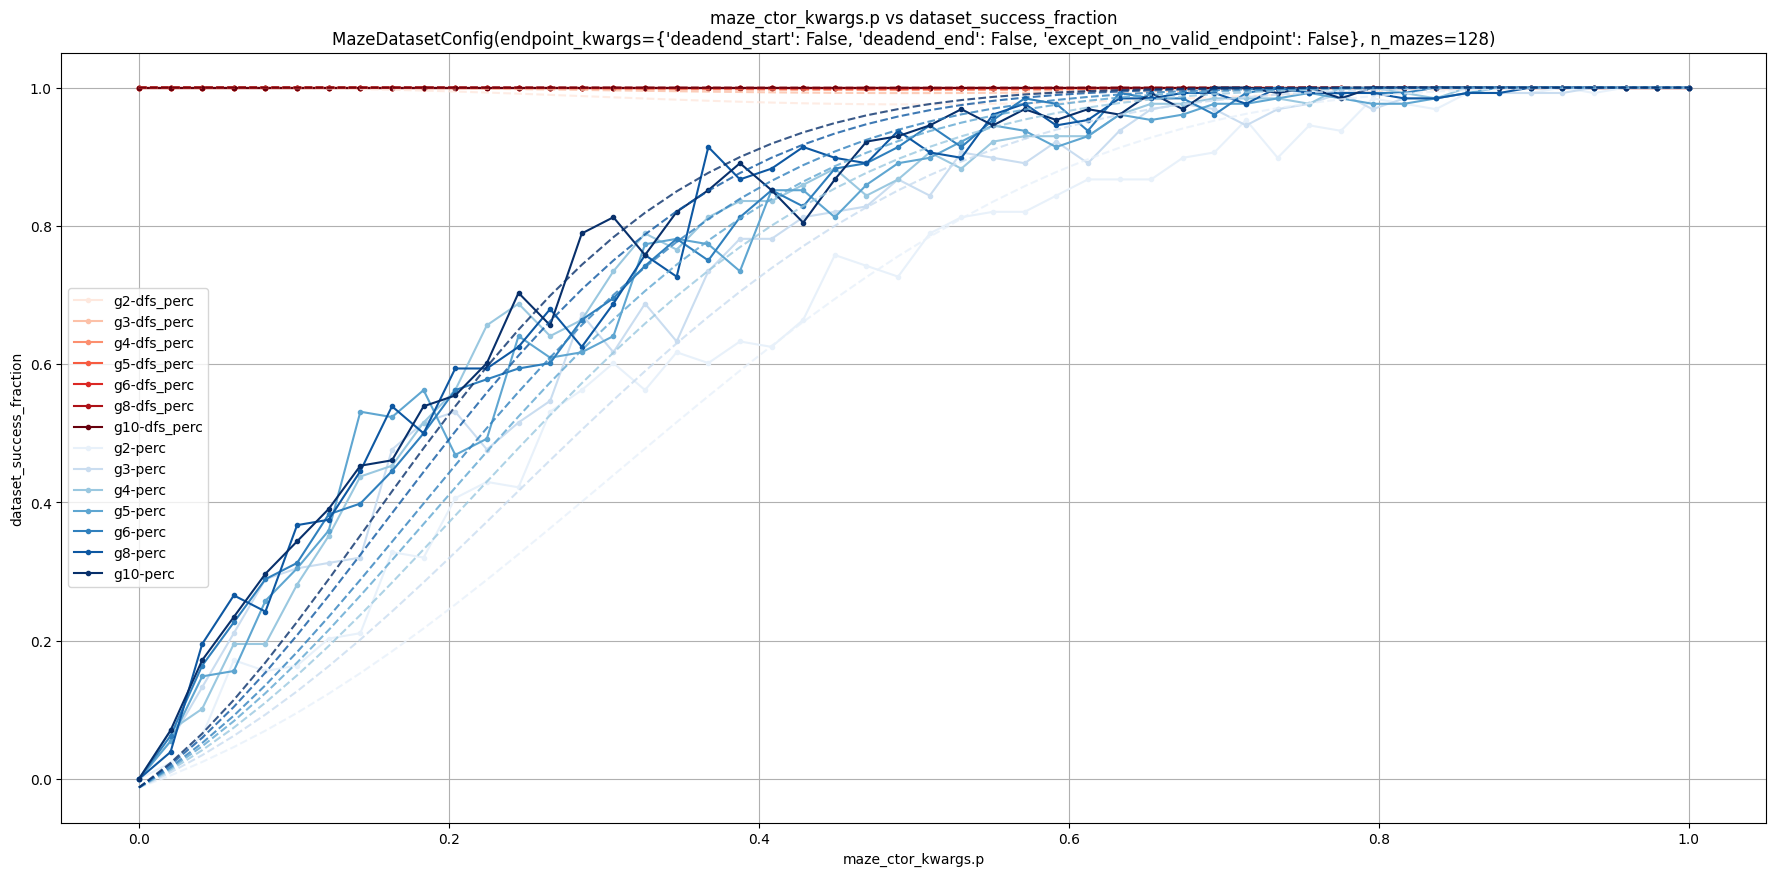

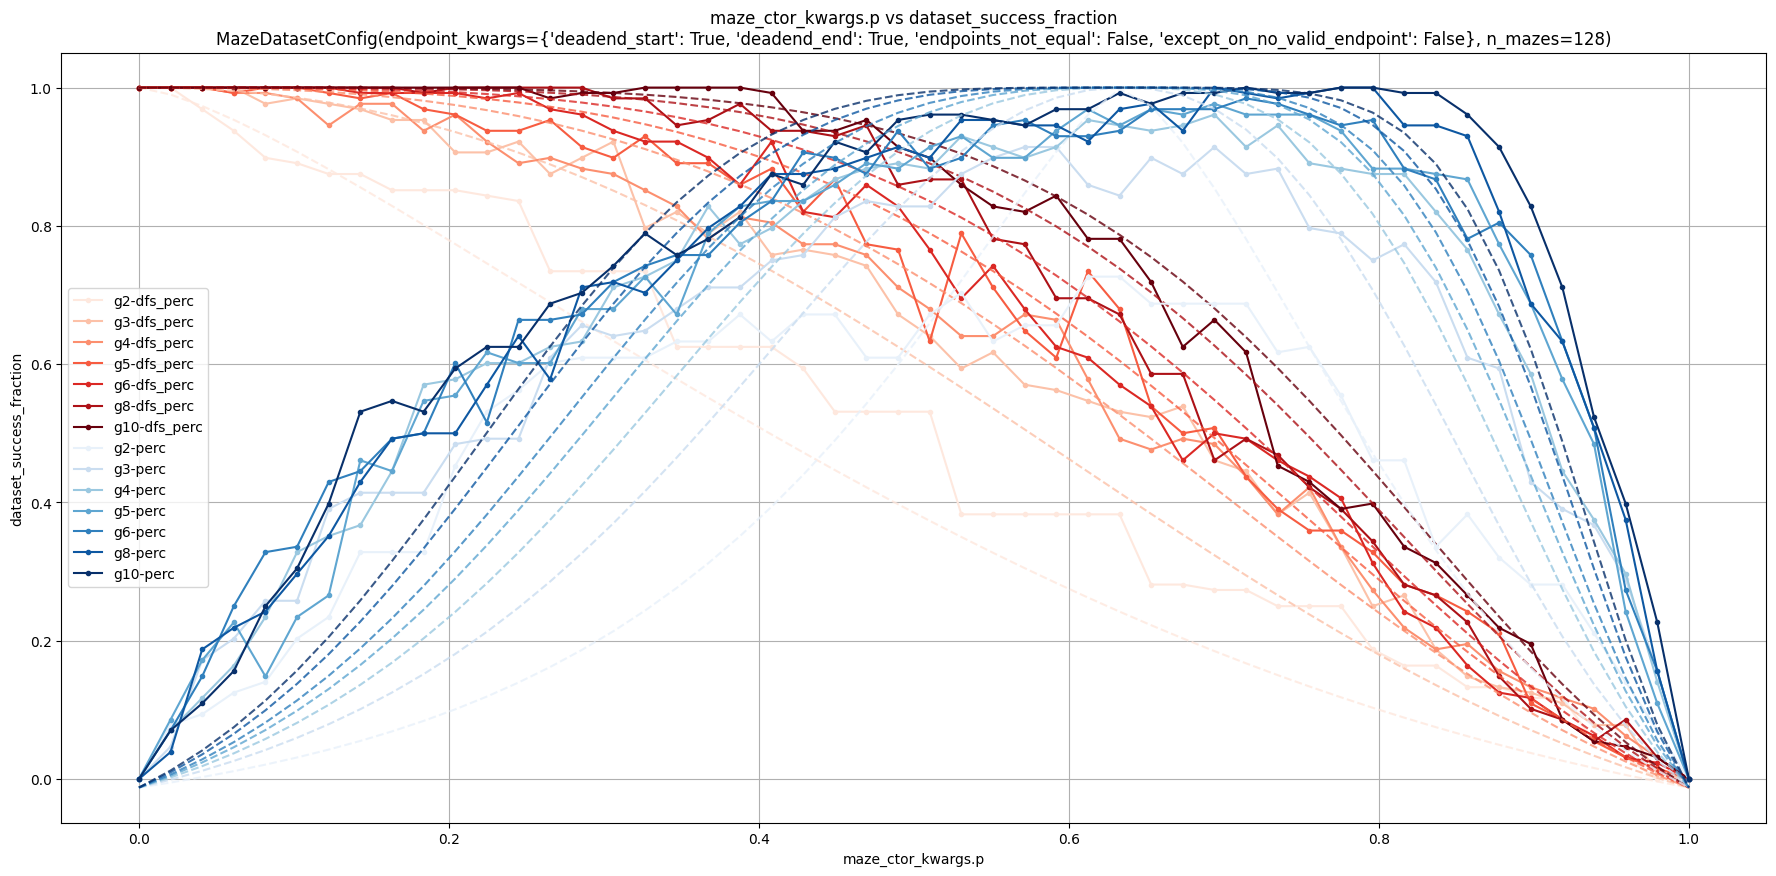

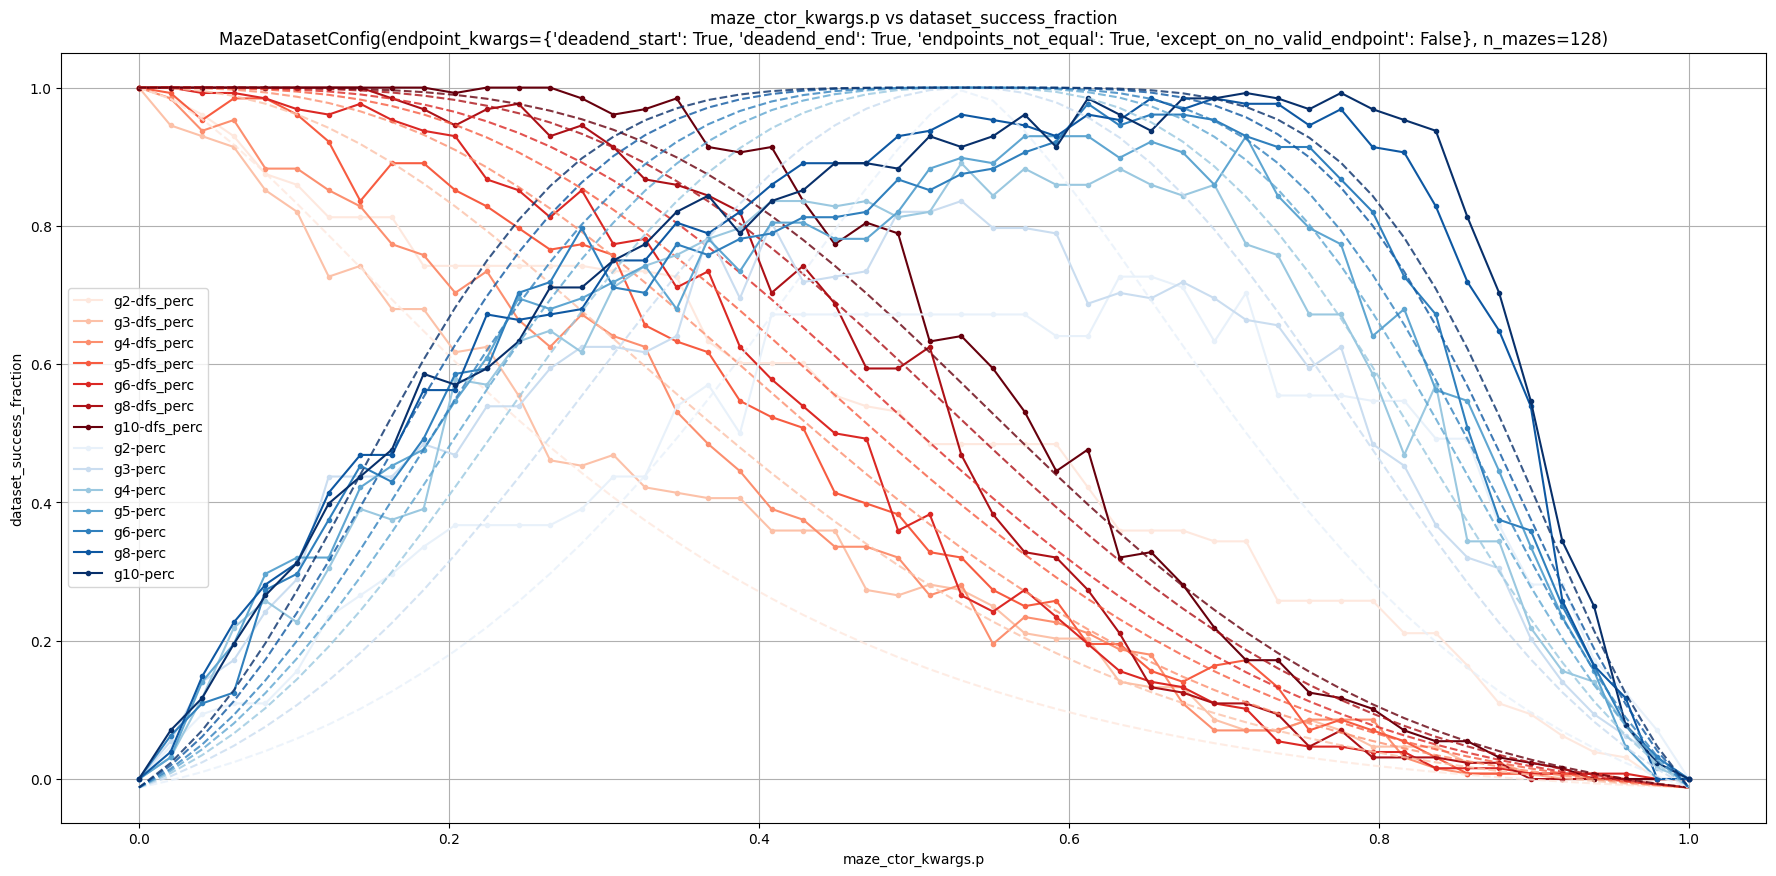

In [9]:
def predict_fn_test(cfg):
	x = cfg._to_ps_array()
	return (
		0.088872485**(
			(
				(x[0] - ((x[0]**x[4])**2 - ((x[0]**(2.2302222 - x[3])) * x[2])))**2
			)**(
				np.log(x[1]) + (0.02142665**x[2])
			)
		) - 0.1
	)*(1 / 0.9)

results_medium: SweepResult = SweepResult.read("../docs/benchmarks/percolation_fractions/medium/result-n128-c42-p50.zanj")
plot_grouped(results_medium, predict_fn=predict_fn_test)

# perform a pysr regression on a dataset we load

loaded data: data.summary() = {'len(configs)': 30, 'len(param_values)': 25, 'len(result_values)': 30, 'param_key': 'maze_ctor_kwargs.p', 'analyze_func': 'dataset_success_fraction'}
training data extracted: X.shape = (750, 5), y.shape = (750,)
Compiling Julia backend...


f:\KNC\maze-dataset\.venv\Lib\site-packages\pysr\sr.py:2780: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
f:\KNC\maze-dataset\.venv\Lib\site-packages\pysr\sr.py:84: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://ai.damtp.cam.ac.uk/pysr/tuning/
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.151e-01  1.594e+01  y = 0.65075
3           9.782e-02  8.151e-02  y = 0.54286 ^ x₂
4           9.448e-02  3.467e-02  y = 0.44178 / sigmoid(x₂)
5           9.078e-02  3.998e-02  y = 0.57371 ^ (x₂ ^ x₄)
6           9.074e-02  4.714e-04  y = 0.58088 ^ square(x₂ ^ x₄)
7           8.440e-02  7.244e-02  y = sigmoid(exp(x₀ * (-2.2016 ^ x₂)))
8           8.295e-02  1.735e-02  y = sigmoid(square(exp(x₀ * (-1.356 ^ x₂))))
9           8.123e-02  2.093e-02  y = sigmoid(square(exp((-2.2016 ^ x₂) * square(x₀))))
10          7.386e-02  9.512e-02  y = sigmoid(x₄) ^ (((x₂ * x₀) * x₁) ^ x₄)
11          6.003e-02  2.073e-01  y = sigmoid(x₀) ^ ((exp(x₂) * (x₂ * x₀)) ^ x₄)
13          5.780e-02  1.889e-02  y = sigmoid(square(sigmoid(x₀))) ^ ((exp(x₂) * (x₂ * x₀)) ...
                                      ^ x₄)
16          5.268e-02  3.091e-02  y = sigm

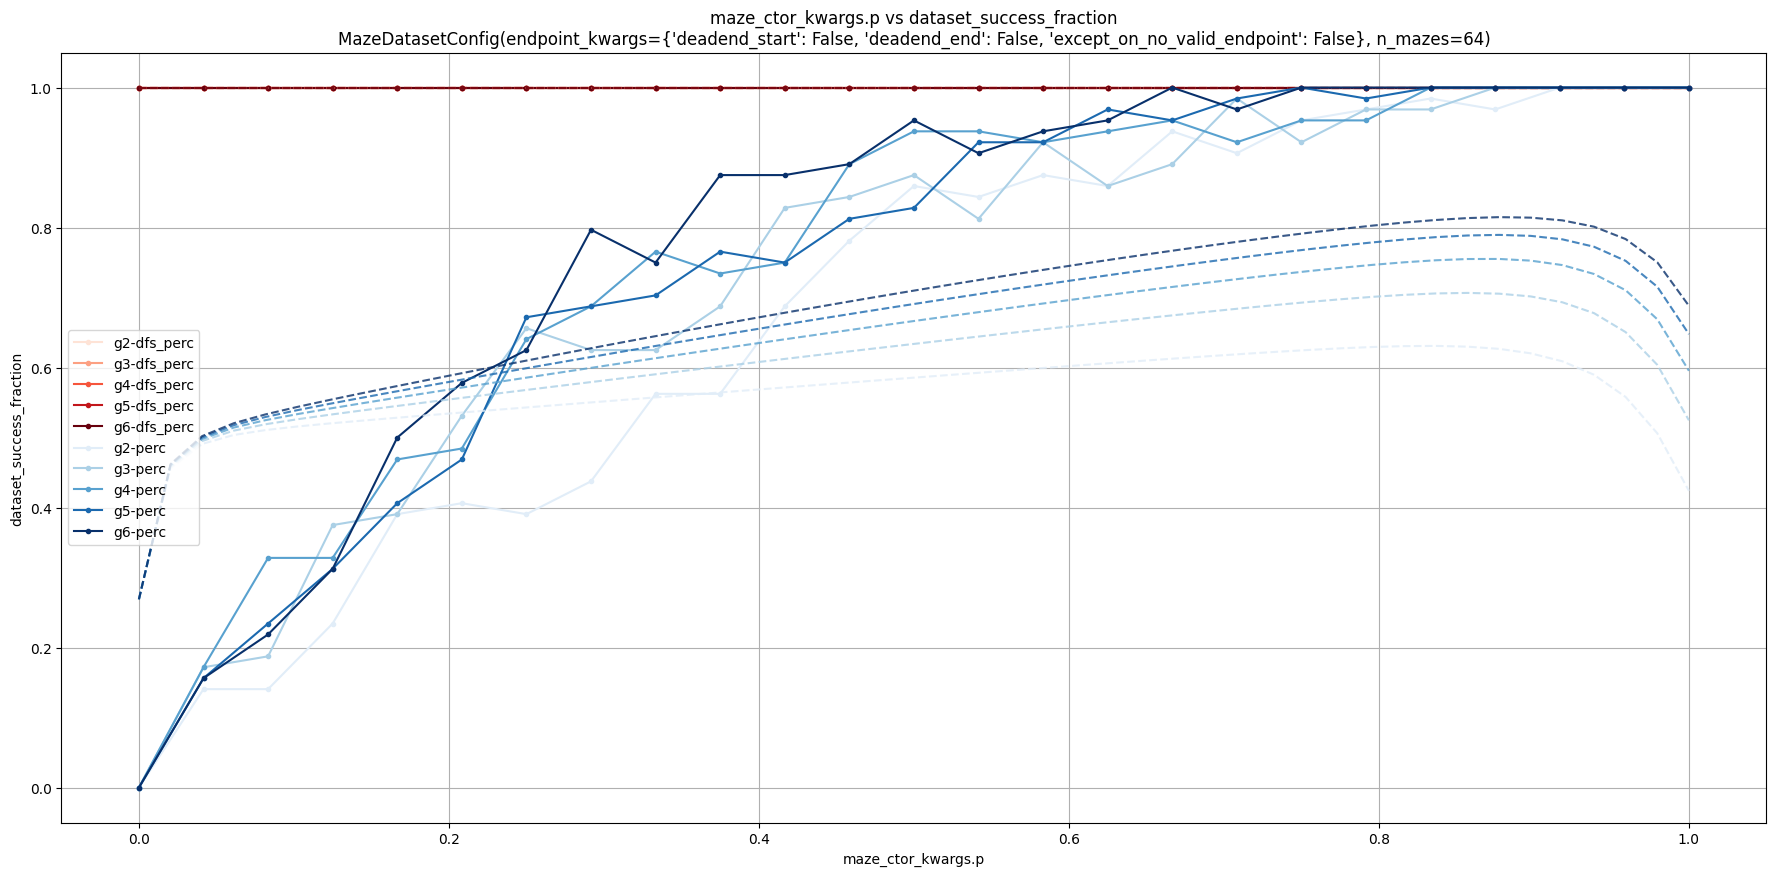

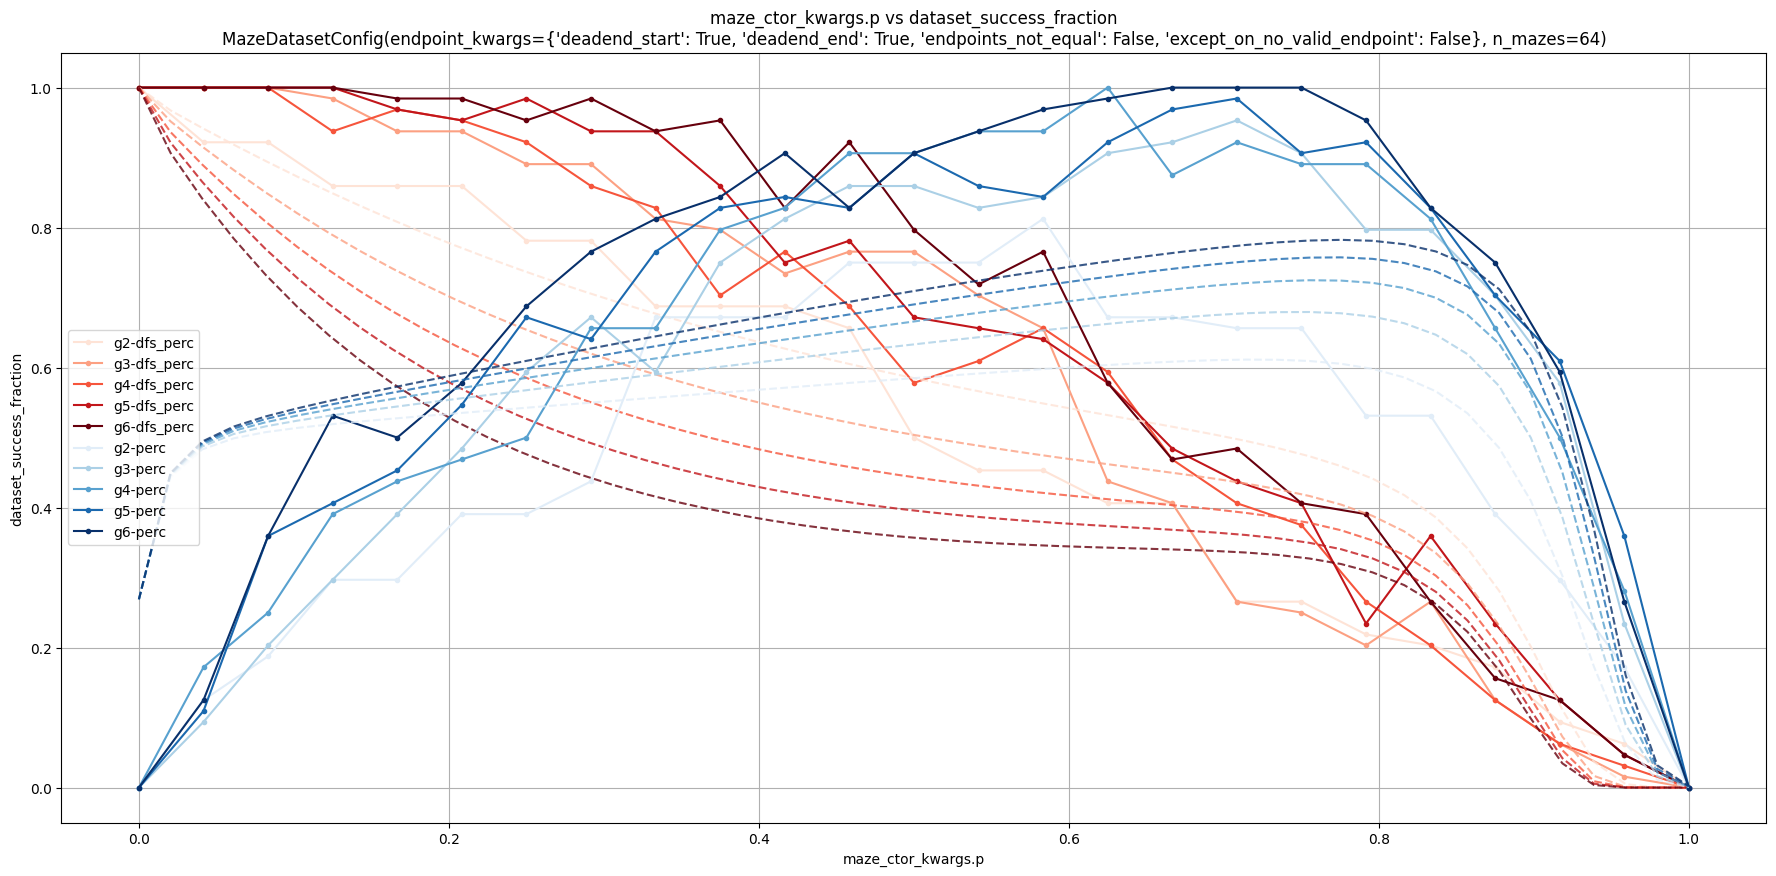

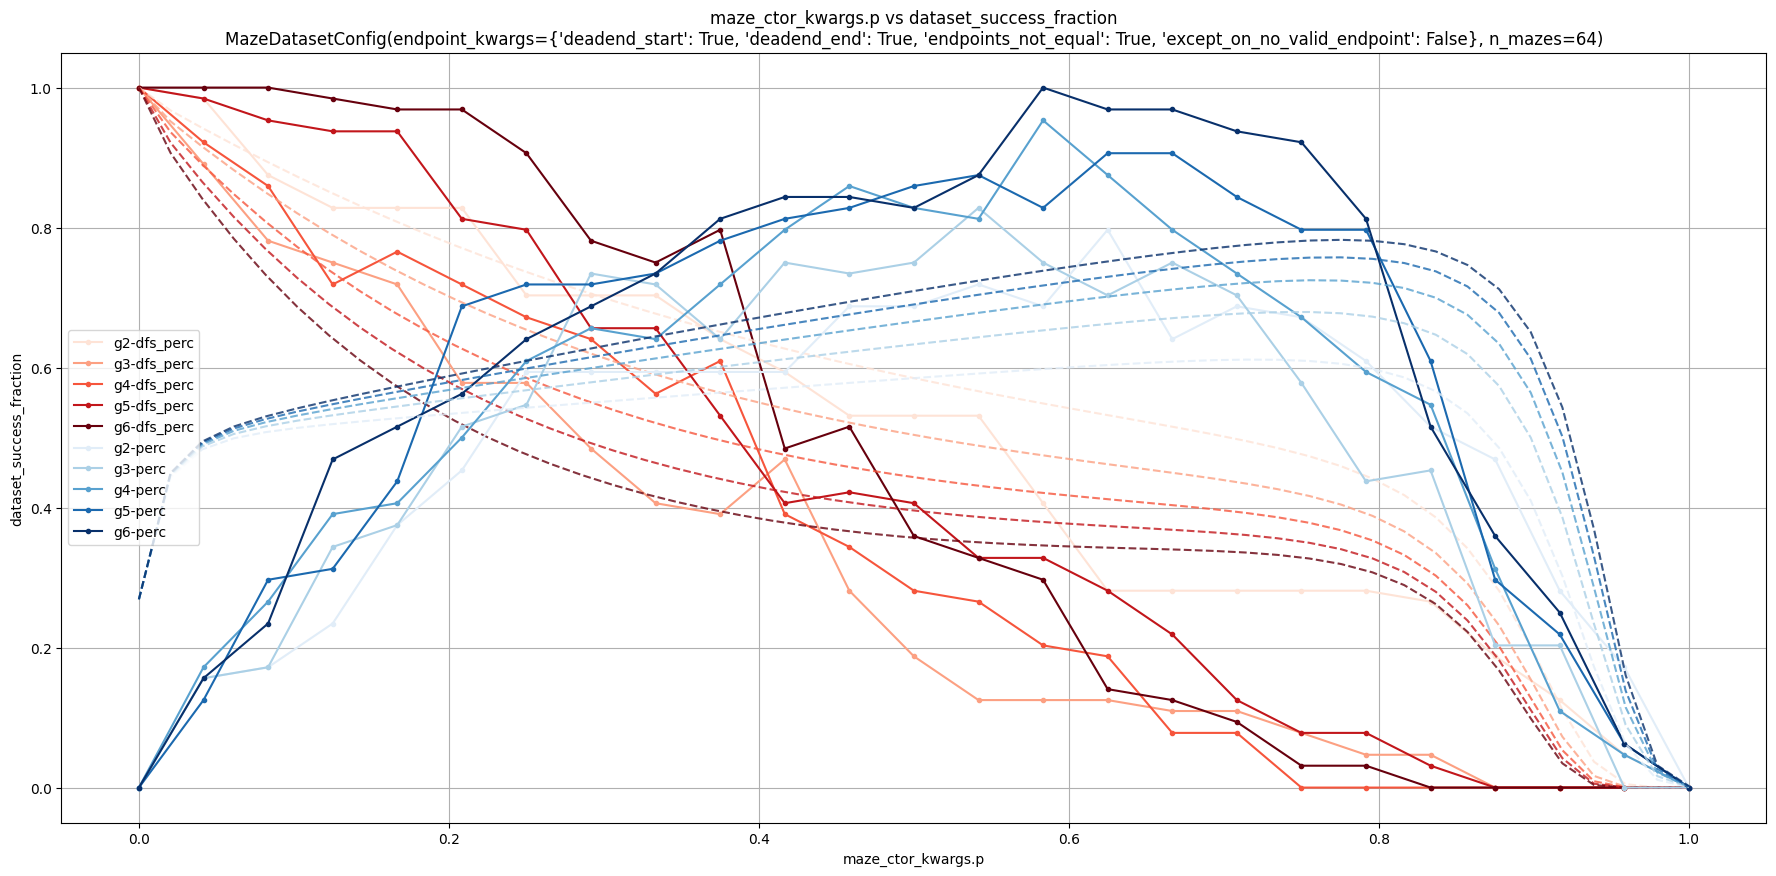

In [6]:
DATA_PATH_DIR: Path = Path("../docs/benchmarks/percolation_fractions/")
# DATA_PATH: str = DATA_PATH_DIR / "large/result-n256-c54-p100.zanj"
# DATA_PATH: str = DATA_PATH_DIR / "medium/result-n128-c42-p50.zanj"
DATA_PATH: str = DATA_PATH_DIR / "small/result-n64-c30-p25.zanj"
# DATA_PATH: str = DATA_PATH_DIR / "test/result-n16-c12-p16.zanj"

sweep_fit(
    DATA_PATH,
    Path("../docs/benchmarks/percolation_fractions/fit_plots/"),
    niterations=10,
)

$$0.14936^{((x_0 - ((((x_0 \cdot 0.94458)^{x_4})^2) - (x_2 \cdot (x_0^{(2.4176 - x_3)}))))^2 + 0.066666)^{(\ln(x_1 + 0.53705) + (-0.079823^{x_2})}}$$